In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [120]:
df.shape

(13320, 9)

In [121]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [122]:
#Droping columns that are not required
df1 = df.drop(['area_type', 'society', 'availability', 'balcony'], axis = "columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [123]:
#Checking for null values this is the first step in data cleaning
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [124]:
#Dropping null values
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [125]:
#Inconsistency in the size column, so we need to clean it
df2.shape

(13246, 5)

In [126]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [127]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

/var/folders/4b/h50tl3k17qj208mf43lhlcjw0000gn/T/ipykernel_2016/886311430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [128]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [129]:
df2[df2.bhk>15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [130]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [131]:
#Take an average of the range value in the total_sqft column because it is not supposed to be a range
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [132]:
# when you add this ~ symbol it will return the opposite of the condition e.g it is return ranges values on the total_sqft column
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [133]:
#The total_sqft has inconcistency in the data, so we need to clean it some have range and others have single values with  units on them, so the function developed below will take care of this problem by ignoring the units and getting the average od the range values
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [134]:
convert_sqft_to_num('2166')

2166.0

In [135]:
#Takes the average of the range values
convert_sqft_to_num('2166 - 2345')

2255.5

In [136]:
#It ignores the entire  recors because of the precence of the unit
convert_sqft_to_num('34.5 sq meter')

In [137]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(6)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2


In [138]:
#Loc means location, it is used to access a group of rows and columns by labels or a boolean array
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [139]:
#Feature enginering and dimensionality reduction techniques
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*1000000/df4['total_sqft']
df4.head(6)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479


In [140]:
#The feature of location are to many which is refered to us  high dimensionality or dimensionality curse, so we need to reduce the number of locations
len(df4.location.unique())

1304

In [141]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [142]:
#Any location that has less that 10 data points will be considered as "other" location
len(location_stats[location_stats<=10])

1052

In [143]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [144]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [145]:
#Outlier detection and removal. You can use standard deviation  or any other method of the domain knowledge to detect outliers
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.000000


In [146]:
df4.shape

(13246, 7)

In [147]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [148]:
df5.price_per_sqft.describe()

count    1.245600e+04
mean     6.308503e+04
std      4.168127e+04
min      2.678298e+03
25%      4.210526e+04
50%      5.294118e+04
75%      6.916667e+04
max      1.764706e+06
Name: price_per_sqft, dtype: float64

In [149]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        standard_deviation = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-standard_deviation)) & (subdf.price_per_sqft<(mean+standard_deviation))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

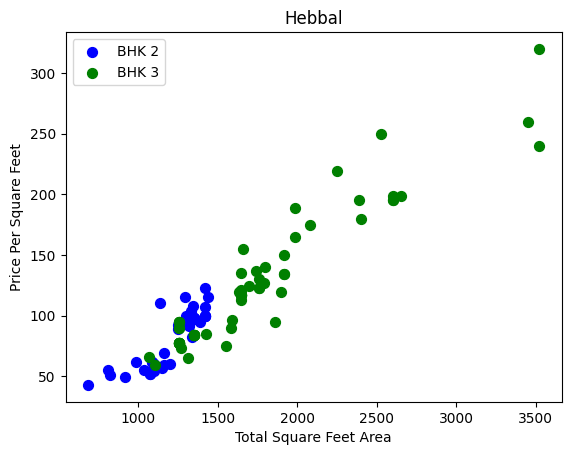

In [150]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='BHK 2', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='BHK 3', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()


plot_scatter_chart(df6, "Hebbal")

In [151]:
def remove_bhk_outliers(df):
    import numpy as np
    exclude_indices = np.array([], dtype=int)
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            bhk_stats[bhk] = stats

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                bad_indices = bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                exclude_indices = np.append(exclude_indices, bad_indices)

    exclude_indices = exclude_indices.astype(int)
    return df.drop(exclude_indices, axis=0)
df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

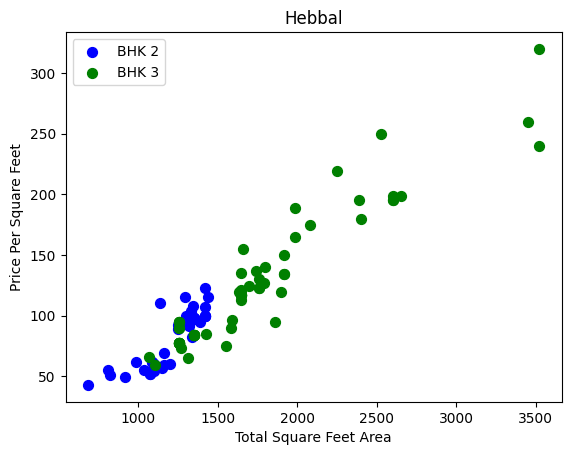

In [152]:
plot_scatter_chart(df6, "Hebbal")

Text(0, 0.5, 'Count')

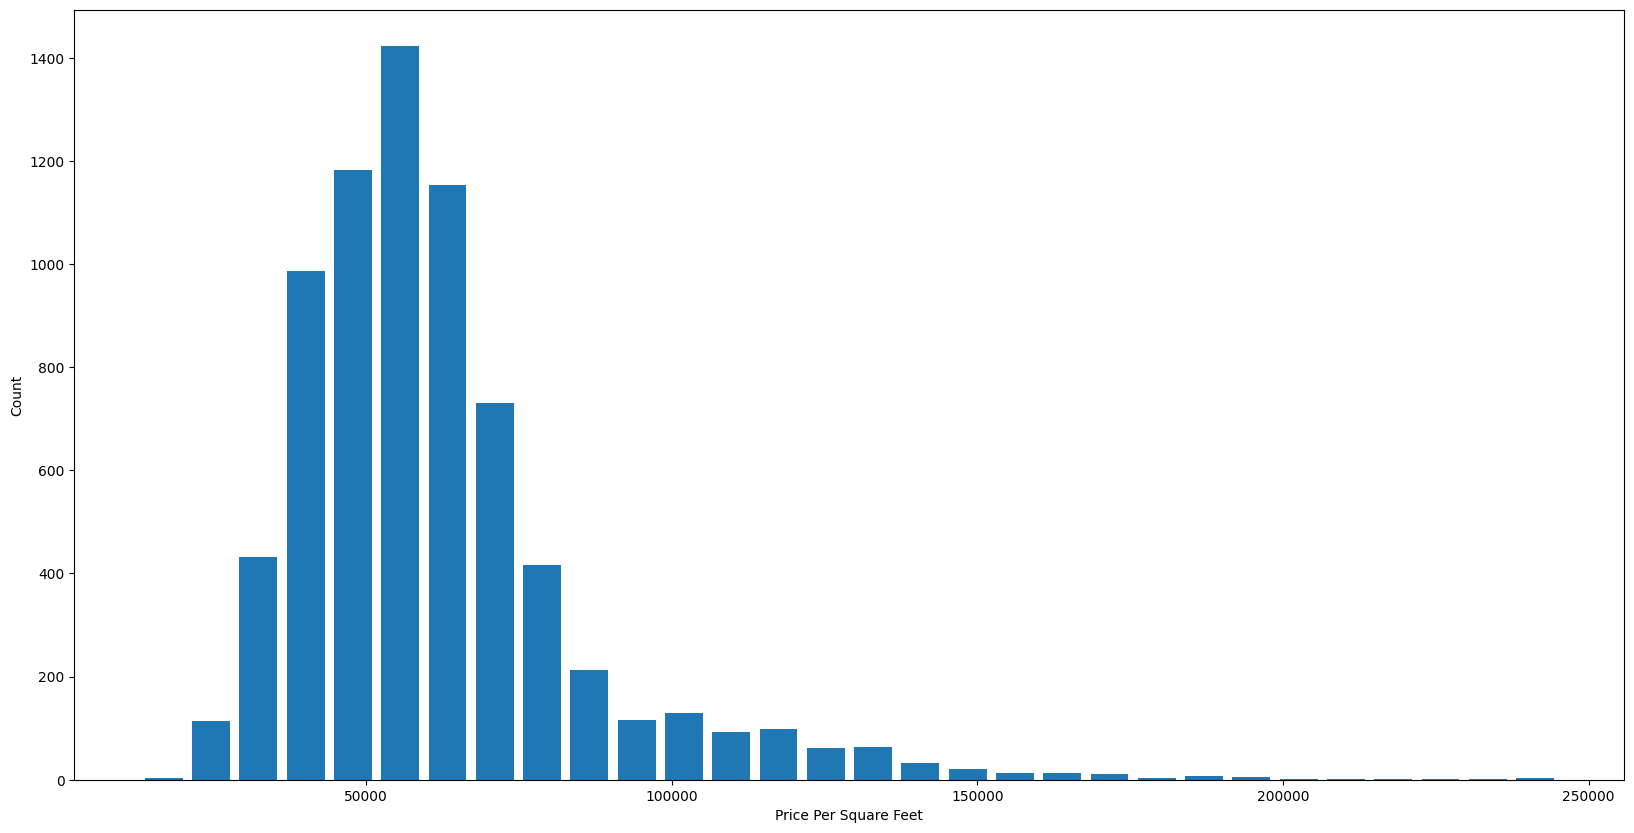

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.hist(df7.price_per_sqft, rwidth=0.8, bins = 30)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [154]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [155]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40000.00000
8486,other,10 BHK,12000.0,12.0,525.0,10,43750.00000
8575,other,16 BHK,10000.0,16.0,550.0,16,55000.00000
9308,other,11 BHK,6000.0,12.0,150.0,11,25000.00000
9639,other,13 BHK,5425.0,13.0,275.0,13,50691.24424


Text(0, 0.5, 'Count')

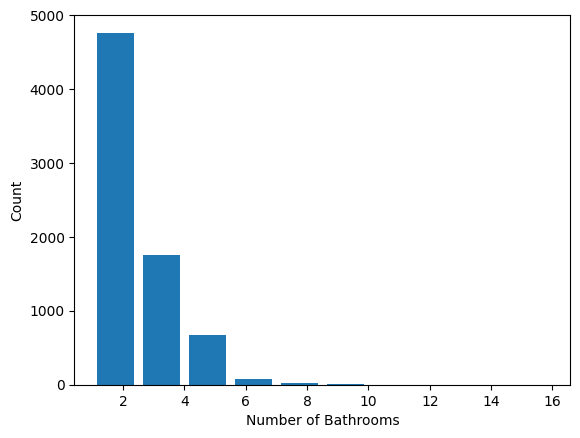

In [156]:
plt.hist(df7.bath, rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [157]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [158]:
df9 = df8.drop(['size', 'price_per_sqft'], axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [159]:
dummies = pd.get_dummies(df9['location']).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
df10 =pd.concat([df9, dummies.drop('other',axis= 'columns')], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
df11 = df10.drop('location', axis='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
df11.shape

(7251, 245)

In [163]:
x = df11.drop('price', axis='columns')
y =df11['price']

In [164]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [167]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
model_linear.score(x_test, y_test)

0.8452277697874278

In [168]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size= 0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv =cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [169]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # 'normalize' deprecated in newer sklearn; you can skip this
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])




In [170]:
find_best_model_using_gridsearchcv(x, y)

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.712817,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [176]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    x_input = np.zeros(len(x.columns))
    x_input[0] = sqft
    x_input[1] = bath
    x_input[2] = bhk
    if loc_index >= 0:
        x_input[loc_index] = 1
    return model_linear.predict([x_input])[0]
  


In [ ]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

/Users/njambi/Documents/projects/RealEstate/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.49904677166796)

In [178]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

/Users/njambi/Documents/projects/RealEstate/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.80519395193329)

In [180]:
predict_price('Indira Nagar', 1000, 3, 2)

/Users/njambi/Documents/projects/RealEstate/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(186.35717978458334)

In [181]:
#Exporting the model to pickle file

import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(model_linear, f)

In [182]:
import json

columns ={
    'data_columns': [col.lower() for col in x.columns]
}
with open("banglore_home_prices_columns.json", "w") as f:
    f.write(json.dumps(columns))
# Saving the model and columns to files